In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

In [2]:
from ipynb.fs.full.ex29_ols_regression import OrdinaryLeastSquares
from ipynb.fs.full.ex30_ridge_regression import RidgeRegression
from ipynb.fs.full.ex31_kernel_ridge_regression import KernelRidgeRegression

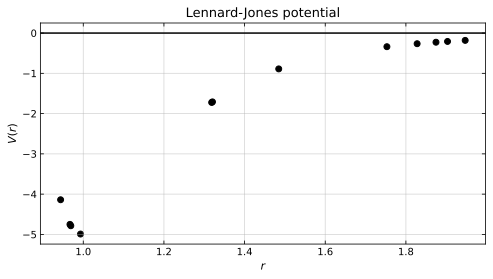

In [3]:
r1s = np.random.uniform(0.85, 1, 4)
r2s = np.random.uniform(1, 2, 8)
rs = np.concatenate((r1s, r2s))
rrange = np.linspace(np.min(rs), np.max(rs), 500)

def potential(r, eps=5, sigma=2**(-1/6)):
    return 4*eps*((sigma/r)**12 - (sigma/r)**6)

# Plot data points
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel=r'$r$', ylabel=r'$V(r)$', title='Lennard-Jones potential')
ax.grid(alpha=0.5)
ax.axhline(0, c='k')
ax.scatter(rs, potential(rs), c='k')

fig.savefig('ex32_fig1.png')

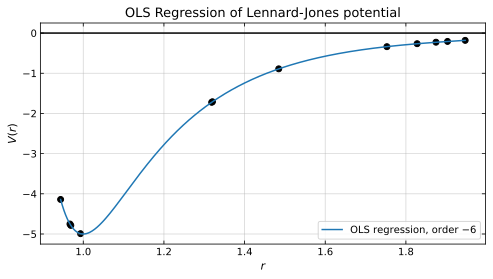

In [4]:
# OLS regression, order -12
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel=r'$r$', ylabel=r'$V(r)$', title='OLS Regression of Lennard-Jones potential')
ax.grid(alpha=0.5)
ax.axhline(0, c='k')
ax.scatter(rs, potential(rs), c='k')

ols = OrdinaryLeastSquares(order=-6)
ols.fit(rs, potential(rs))
ax.plot(rrange, ols.predict(rrange), label=fr'OLS regression, order ${ols.order}$')
ax.legend()

fig.savefig('ex32_fig2.png')

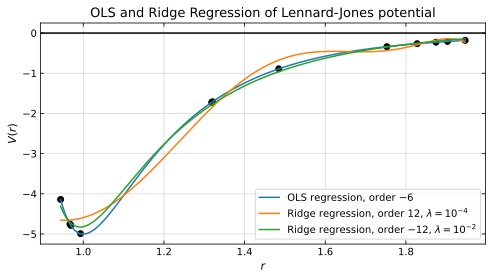

In [5]:
# Now include ridge regression, lambda = 10^-4 and 10^-2
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel=r'$r$', ylabel=r'$V(r)$', title='OLS and Ridge Regression of Lennard-Jones potential')
ax.grid(alpha=0.5)
ax.axhline(0, c='k')
ax.scatter(rs, potential(rs), c='k')

ols = OrdinaryLeastSquares(order=-6)
ols.fit(rs, potential(rs))
ax.plot(rrange, ols.predict(rrange), label=fr'OLS regression, order ${ols.order}$')

for order, lambda_ in zip([12, -12], [1e-4, 1e-2]):
    ridge = RidgeRegression(order=order, lambda_=lambda_)
    ridge.fit(rs, potential(rs))
    ax.plot(rrange, ridge.predict(rrange), label=fr'Ridge regression, order ${ridge.order}$, $\lambda = 10^{{{int(np.log10(lambda_))}}}$')

ax.legend()

fig.savefig('ex32_fig3.png')

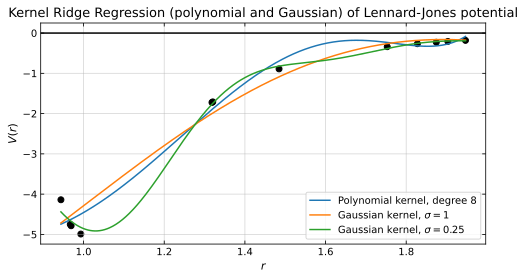

In [6]:
# New plot with kernel ridge regression. One polynomial of order 8. Two Gaussian kernels with sigma = 1 and 0.25
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlabel=r'$r$', ylabel=r'$V(r)$', title='Kernel Ridge Regression (polynomial and Gaussian) of Lennard-Jones potential')
ax.grid(alpha=0.5)
ax.axhline(0, c='k')
ax.scatter(rs, potential(rs), c='k')

# Polynomial kernel
krr = KernelRidgeRegression(kernel='polynomial', degree=8, lambda_=1e-2)
krr.fit(rs, potential(rs))
ax.plot(rrange, np.array([krr.predict(r) for r in rrange]), label=fr'Polynomial kernel, degree {krr.degree}')

# Gaussian kernels
for sigma in [1, 0.25]:
    krr = KernelRidgeRegression(kernel='gaussian', sigma=sigma, lambda_=1e-2)
    krr.fit(rs, potential(rs))
    ax.plot(rrange, np.array([krr.predict(r) for r in rrange]), label=fr'Gaussian kernel, $\sigma = {sigma}$')

ax.legend()

fig.savefig('ex32_fig4.png')